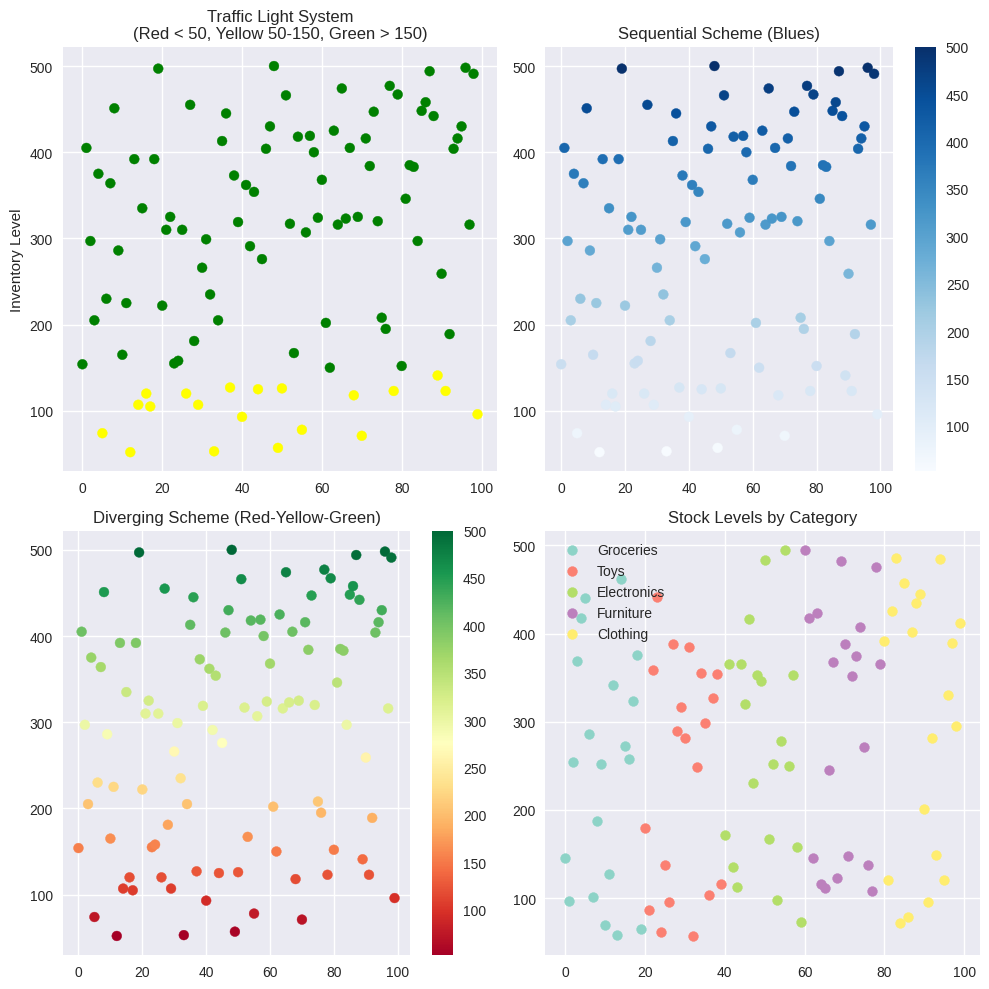

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('retail_store_inventory.csv')

def plot_color_schemes():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Traffic light system
    sample_data = df['Inventory Level'].sample(100)
    colors = ['red' if x < 50 else 'yellow' if x < 150 else 'green' for x in sample_data]
    axes[0,0].scatter(range(100), sample_data, c=colors, s=50)
    axes[0,0].set_title('Traffic Light System\n(Red < 50, Yellow 50-150, Green > 150)')
    axes[0,0].set_ylabel('Inventory Level')

    # Sequential scheme
    scatter = axes[0,1].scatter(range(100), sample_data,
                              c=sample_data, cmap='Blues', s=50)
    axes[0,1].set_title('Sequential Scheme (Blues)')
    plt.colorbar(scatter, ax=axes[0,1])

    # Diverging scheme
    scatter = axes[1,0].scatter(range(100), sample_data,
                              c=sample_data, cmap='RdYlGn', s=50)
    axes[1,0].set_title('Diverging Scheme (Red-Yellow-Green)')
    plt.colorbar(scatter, ax=axes[1,0])

    # By category
    categories = df['Category'].unique()
    colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
    for i, category in enumerate(categories):
        cat_data = df[df['Category'] == category]['Inventory Level'].sample(20)
        axes[1,1].scatter(range(i*20, (i+1)*20), cat_data,
                         color=colors[i], label=category, s=50)
    axes[1,1].set_title('Stock Levels by Category')
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

plot_color_schemes()

In [ ]:
def visualization_pipeline():
    pipeline_steps = {
        'Step 1': 'Data Collection & Validation',
        'Step 2': 'Data Cleaning & Preprocessing',
        'Step 3': 'Feature Engineering',
        'Step 4': 'Exploratory Data Analysis',
        'Step 5': 'Dashboard Design',
        'Step 6': 'Interactive Visualization',
        'Step 7': 'Real-time Monitoring',
        'Step 8': 'Predictive Analytics',
        'Step 9': 'Alert System Implementation'
    }

    print("VISUALIZATION PIPELINE")
    print("=" * 40)
    for step, description in pipeline_steps.items():
        print(f"{step}: {description}")

    # Example metrics calculation
    df['Stock_Turnover'] = df['Units Sold'] / df['Inventory Level'].replace(0, 1)
    df['Days_of_Supply'] = df['Inventory Level'] / df['Units Sold'].replace(0, 1)

    print(f"\nDerived Metrics Created:")
    print(f"- Stock Turnover Ratio")
    print(f"- Days of Supply")
    print(f"- Stockout Risk Score")

visualization_pipeline()

VISUALIZATION PIPELINE
Step 1: Data Collection & Validation
Step 2: Data Cleaning & Preprocessing
Step 3: Feature Engineering
Step 4: Exploratory Data Analysis
Step 5: Dashboard Design
Step 6: Interactive Visualization
Step 7: Real-time Monitoring
Step 8: Predictive Analytics
Step 9: Alert System Implementation

Derived Metrics Created:
- Stock Turnover Ratio
- Days of Supply
- Stockout Risk Score


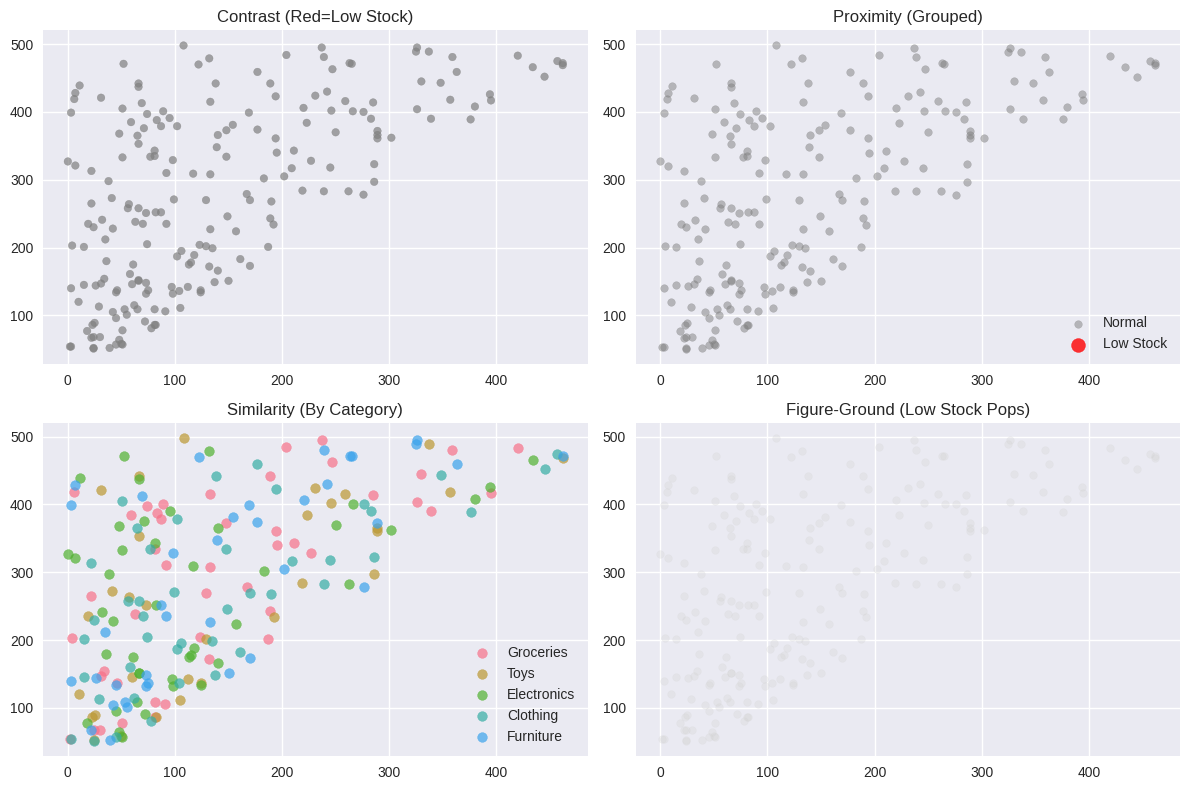

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('retail_store_inventory.csv')

def gestalt_demo():
    sample_df = df.sample(200).copy()
    sample_df['Low_Stock'] = sample_df['Inventory Level'] < 50

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Contrast
    colors = ['red' if low else 'gray' for low in sample_df['Low_Stock']]
    sizes = [100 if low else 30 for low in sample_df['Low_Stock']]
    axes[0,0].scatter(sample_df['Units Sold'], sample_df['Inventory Level'], c=colors, s=sizes, alpha=0.7)
    axes[0,0].set_title('Contrast (Red=Low Stock)')

    # Proximity
    low = sample_df[sample_df['Low_Stock']]
    normal = sample_df[~sample_df['Low_Stock']]
    axes[0,1].scatter(normal['Units Sold'], normal['Inventory Level'], c='gray', s=30, alpha=0.5, label='Normal')
    axes[0,1].scatter(low['Units Sold'], low['Inventory Level'], c='red', s=100, alpha=0.8, label='Low Stock')
    axes[0,1].set_title('Proximity (Grouped)')
    axes[0,1].legend()

    # Similarity
    for category in sample_df['Category'].unique():
        cat_data = sample_df[sample_df['Category'] == category]
        axes[1,0].scatter(cat_data['Units Sold'], cat_data['Inventory Level'], label=category, alpha=0.7)
    axes[1,0].set_title('Similarity (By Category)')
    axes[1,0].legend()

    # Figure-Ground
    axes[1,1].scatter(sample_df['Units Sold'], sample_df['Inventory Level'], c='lightgray', s=30, alpha=0.3)
    axes[1,1].scatter(low['Units Sold'], low['Inventory Level'], c='red', s=100, alpha=1.0)
    axes[1,1].set_title('Figure-Ground (Low Stock Pops)')

    plt.tight_layout()
    plt.show()

gestalt_demo()

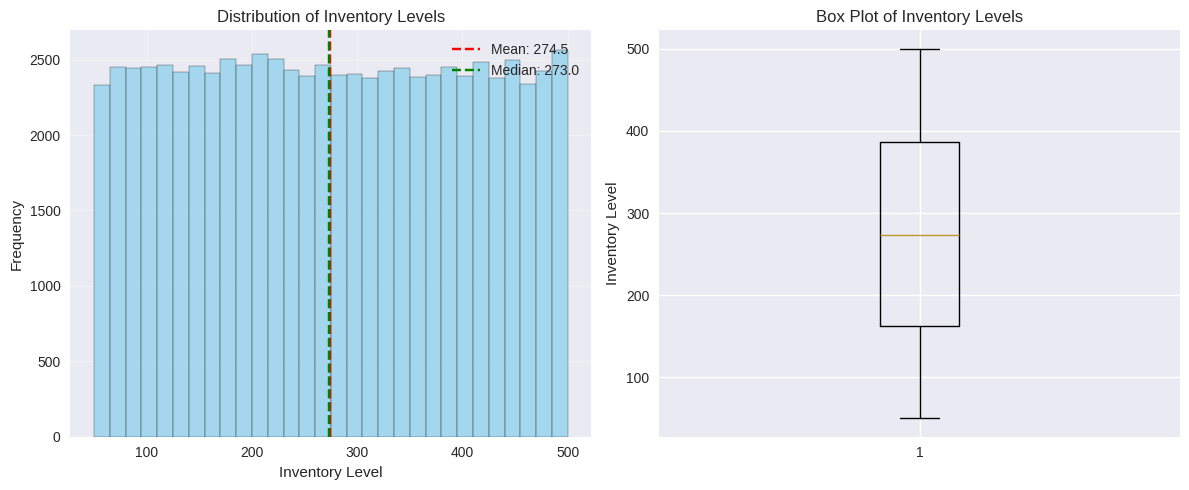

Statistics:
Mean: 274.47
Median: 273.00
Std: 129.95
Min: 50
Max: 500


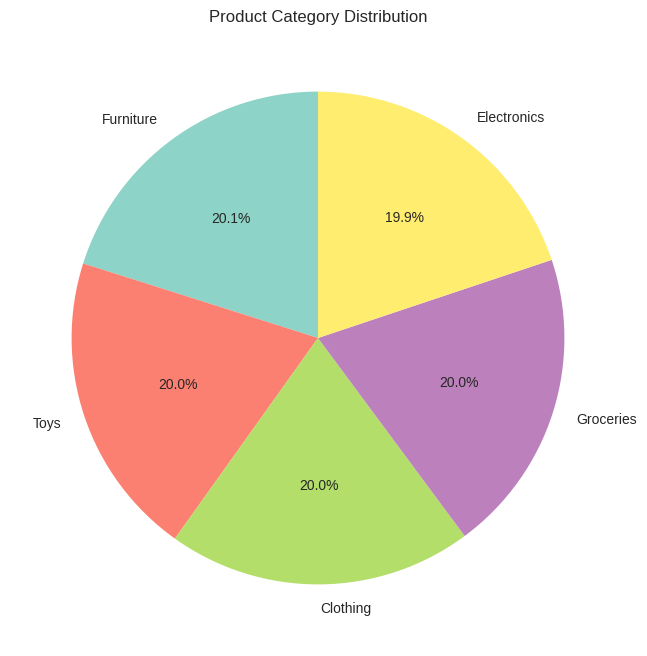

Category Distribution:
Furniture: 14699 records (20.1%)
Toys: 14643 records (20.0%)
Clothing: 14626 records (20.0%)
Groceries: 14611 records (20.0%)
Electronics: 14521 records (19.9%)


In [ ]:
# 4a. Histogram of stock levels
def plot_inventory_histogram():
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df['Inventory Level'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(df['Inventory Level'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["Inventory Level"].mean():.1f}')
    plt.axvline(df['Inventory Level'].median(), color='green', linestyle='--',
                label=f'Median: {df["Inventory Level"].median():.1f}')
    plt.xlabel('Inventory Level')
    plt.ylabel('Frequency')
    plt.title('Distribution of Inventory Levels')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    # Box plot
    plt.boxplot(df['Inventory Level'])
    plt.ylabel('Inventory Level')
    plt.title('Box Plot of Inventory Levels')

    plt.tight_layout()
    plt.show()

    print(f"Statistics:")
    print(f"Mean: {df['Inventory Level'].mean():.2f}")
    print(f"Median: {df['Inventory Level'].median():.2f}")
    print(f"Std: {df['Inventory Level'].std():.2f}")
    print(f"Min: {df['Inventory Level'].min()}")
    print(f"Max: {df['Inventory Level'].max()}")

plot_inventory_histogram()

# 4b. Pie chart of product categories
def plot_category_pie():
    category_counts = df['Category'].value_counts()

    plt.figure(figsize=(10, 8))
    plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, len(category_counts))))
    plt.title('Product Category Distribution')
    plt.show()

    print("Category Distribution:")
    for category, count in category_counts.items():
        print(f"{category}: {count} records ({count/len(df)*100:.1f}%)")

plot_category_pie()

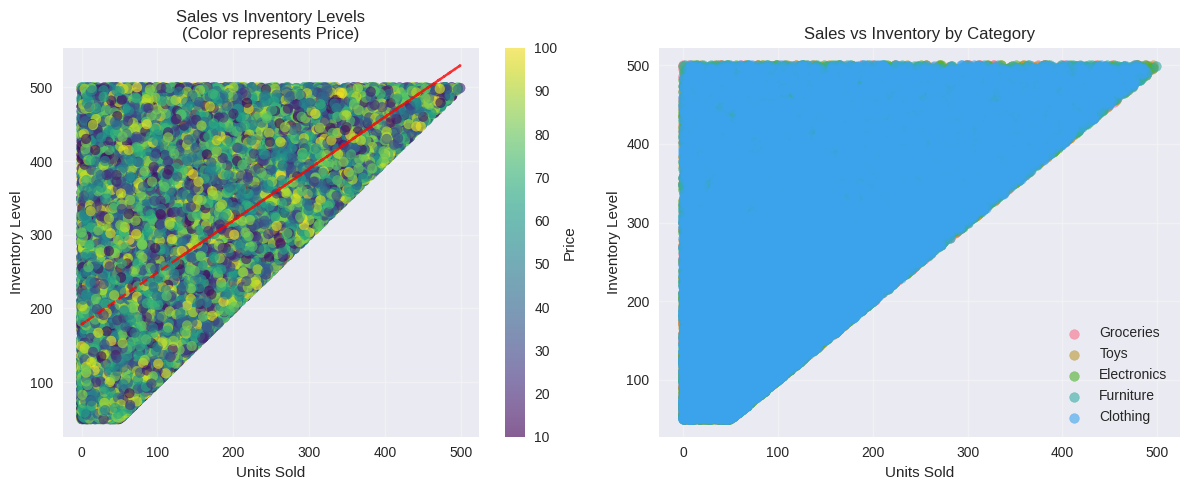

Correlation between Sales and Inventory: 0.590


<Figure size 1200x600 with 0 Axes>

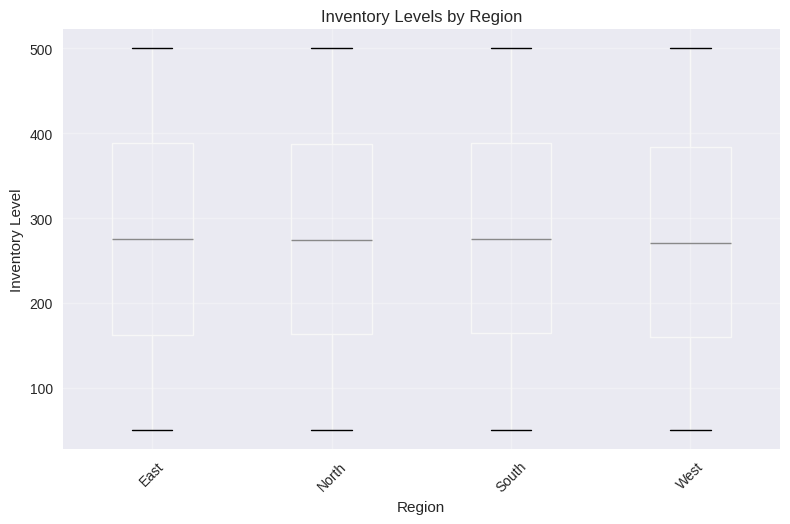

Inventory Statistics by Region:
          mean  median     std  count
Region                               
East    275.29   275.0  130.49  18349
North   274.80   274.0  129.79  18228
South   275.31   275.0  129.84  18297
West    272.47   270.0  129.66  18226


In [ ]:
# 5a. Scatterplot of sales vs stock levels
def plot_sales_vs_stock():
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(df['Units Sold'], df['Inventory Level'],
                         c=df['Price'], alpha=0.6, cmap='viridis')
    plt.colorbar(scatter, label='Price')
    plt.xlabel('Units Sold')
    plt.ylabel('Inventory Level')
    plt.title('Sales vs Inventory Levels\n(Color represents Price)')
    plt.grid(True, alpha=0.3)

    # Add correlation line
    z = np.polyfit(df['Units Sold'], df['Inventory Level'], 1)
    p = np.poly1d(z)
    plt.plot(df['Units Sold'], p(df['Units Sold']), "r--", alpha=0.8)

    plt.subplot(1, 2, 2)
    # By category
    categories = df['Category'].unique()
    for category in categories:
        cat_data = df[df['Category'] == category]
        plt.scatter(cat_data['Units Sold'], cat_data['Inventory Level'],
                   label=category, alpha=0.6)
    plt.xlabel('Units Sold')
    plt.ylabel('Inventory Level')
    plt.title('Sales vs Inventory by Category')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    correlation = df['Units Sold'].corr(df['Inventory Level'])
    print(f"Correlation between Sales and Inventory: {correlation:.3f}")

plot_sales_vs_stock()

# 5b. Box plot of stock by region
def plot_stock_by_region():
    plt.figure(figsize=(12, 6))

    # Box plot
    df.boxplot(column='Inventory Level', by='Region', grid=False)
    plt.title('Inventory Levels by Region')
    plt.suptitle('')  # Remove automatic title
    plt.ylabel('Inventory Level')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Summary statistics by region
    region_stats = df.groupby('Region')['Inventory Level'].agg(['mean', 'median', 'std', 'count'])
    print("Inventory Statistics by Region:")
    print(region_stats.round(2))

plot_stock_by_region()

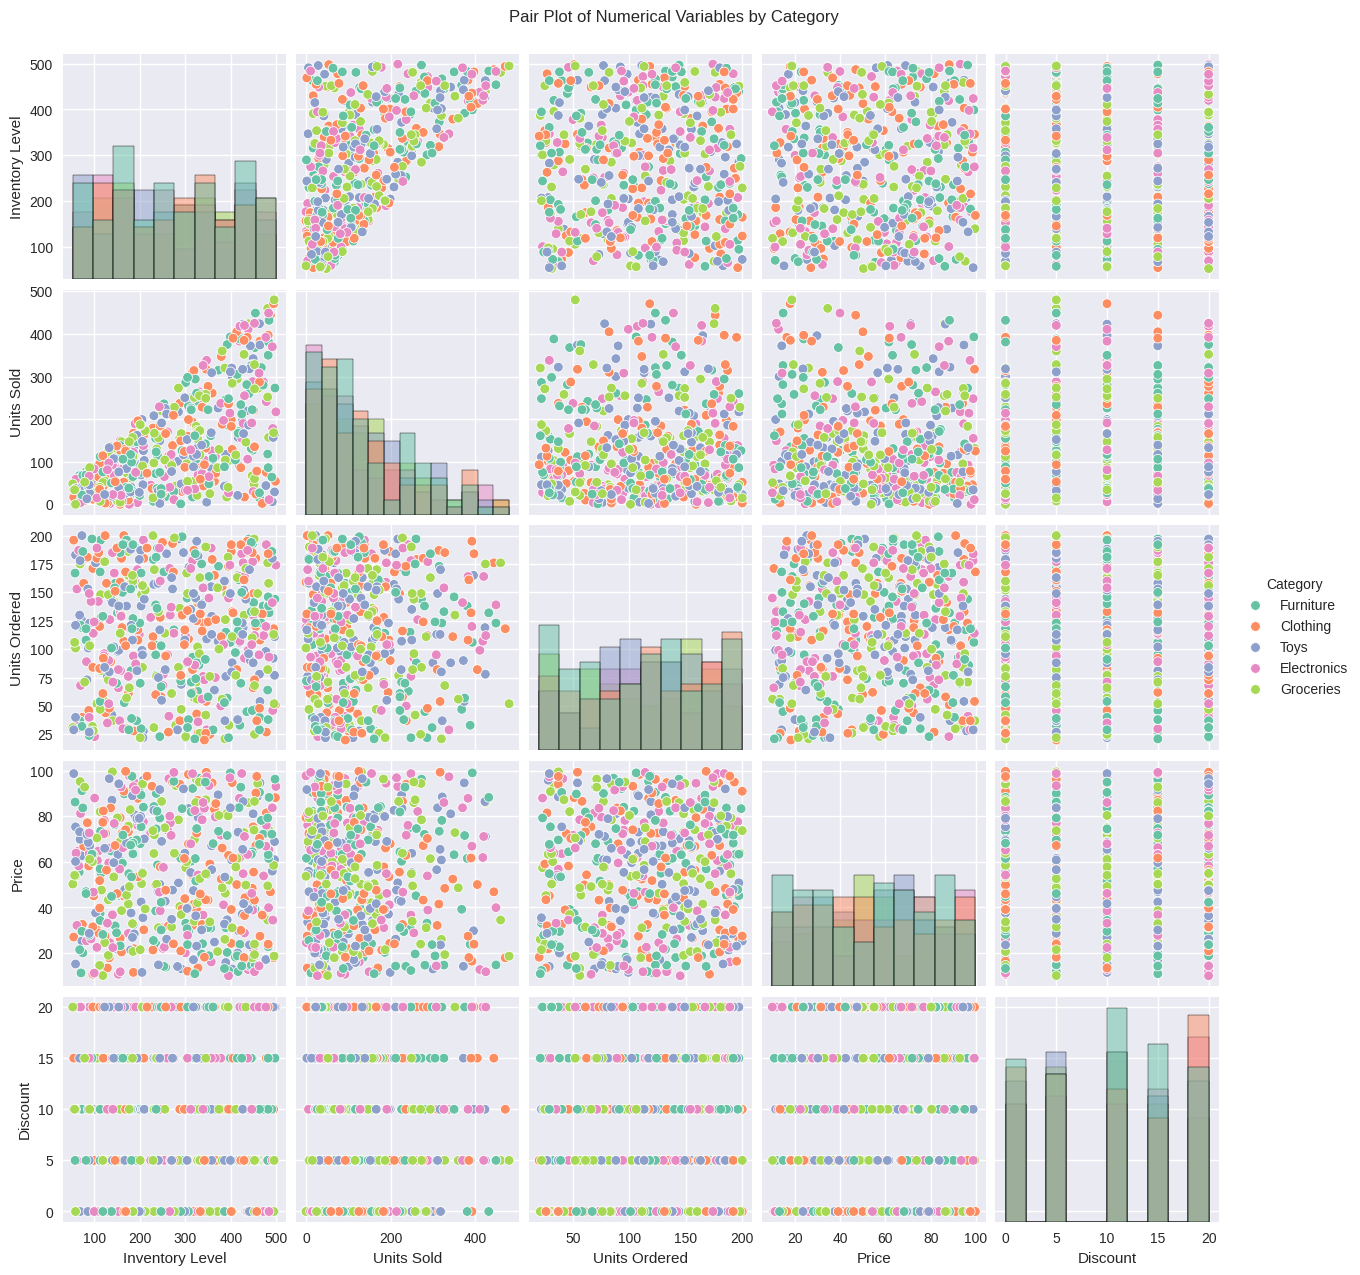

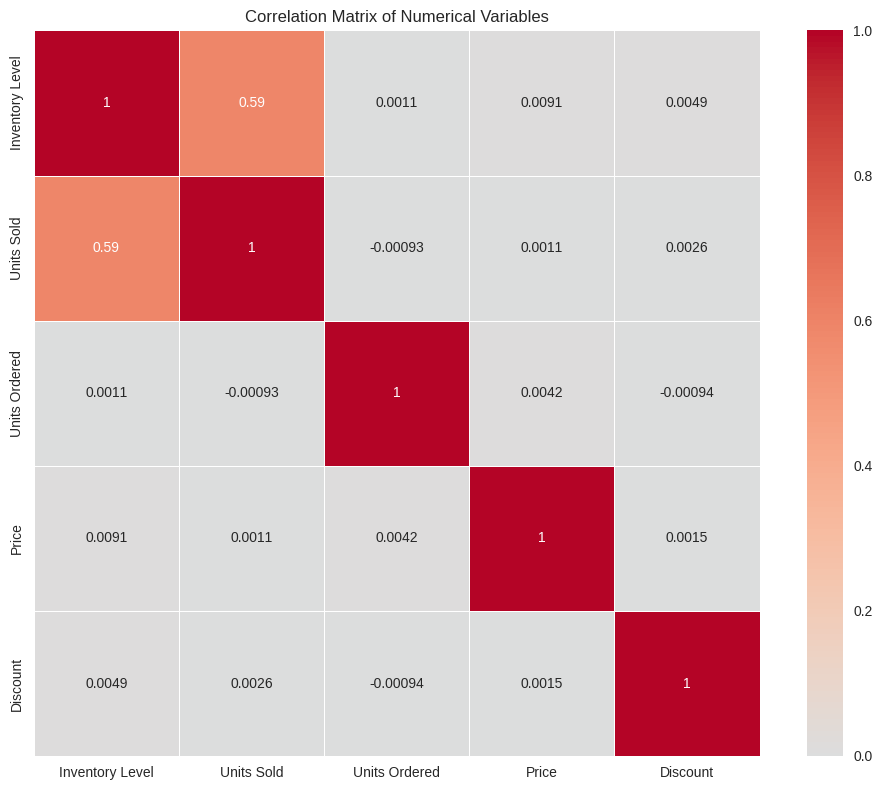

Suggested combined visualizations:
1. Parallel Coordinates Plot (shown above)
2. 3D Scatter Plot (Inventory vs Sales vs Price)
3. Small Multiples by Category
4. Radar Chart for Product Performance


In [ ]:
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 6a. Pair plot of stock, sales, and restock frequency
def multivariate_pair_plot():
    # Calculate restock frequency (simplified)
    sample_df = df.sample(500)  # Sample for performance

    numerical_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount']

    # Seaborn pairplot
    g = sns.pairplot(sample_df[numerical_cols + ['Category']],
                    hue='Category', diag_kind='hist', palette='Set2')
    g.fig.suptitle('Pair Plot of Numerical Variables by Category', y=1.02)
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

multivariate_pair_plot()

# 6b. Combined visualization suggestion
def parallel_coordinates_plot():
    import plotly.express as px

    sample_df = df.sample(300)

    fig = px.parallel_coordinates(sample_df,
                                dimensions=['Inventory Level', 'Units Sold', 'Units Ordered', 'Price'],
                                color='Inventory Level',
                                color_continuous_scale=px.colors.diverging.Tealrose,
                                title='Parallel Coordinates Plot: Multi-dimensional Inventory Analysis')
    fig.show()

    print("Suggested combined visualizations:")
    print("1. Parallel Coordinates Plot (shown above)")
    print("2. 3D Scatter Plot (Inventory vs Sales vs Price)")
    print("3. Small Multiples by Category")
    print("4. Radar Chart for Product Performance")

parallel_coordinates_plot()

In [ ]:
import plotly.express as px

def hierarchical_visualization():
    # Aggregate data for hierarchical view
    hierarchical_data = df.groupby(['Region', 'Store ID', 'Category']).agg({
        'Inventory Level': 'sum',
        'Units Sold': 'sum',
        'Product ID': 'count',
        'Price': 'mean'
    }).reset_index()
    hierarchical_data.rename(columns={'Product ID': 'Product Count'}, inplace=True)

    # Treemap
    fig = px.treemap(hierarchical_data,
                    path=['Region', 'Store ID', 'Category'],
                    values='Inventory Level',
                    color='Units Sold',
                    color_continuous_scale='RdYlBu',
                    title='Hierarchical Inventory View: Region → Store → Category')
    fig.show()

    # Sunburst chart
    fig2 = px.sunburst(hierarchical_data,
                      path=['Region', 'Category'],
                      values='Inventory Level',
                      color='Units Sold',
                      title='Sunburst Chart: Region → Category Inventory Distribution')
    fig2.show()

    print("Hierarchical Structure:")
    print("Level 1: Regions (4)")
    print("Level 2: Stores (5 per region)")
    print("Level 3: Categories (5)")
    print("Level 4: Products (20 per category)")

hierarchical_visualization()

Hierarchical Structure:
Level 1: Regions (4)
Level 2: Stores (5 per region)
Level 3: Categories (5)
Level 4: Products (20 per category)


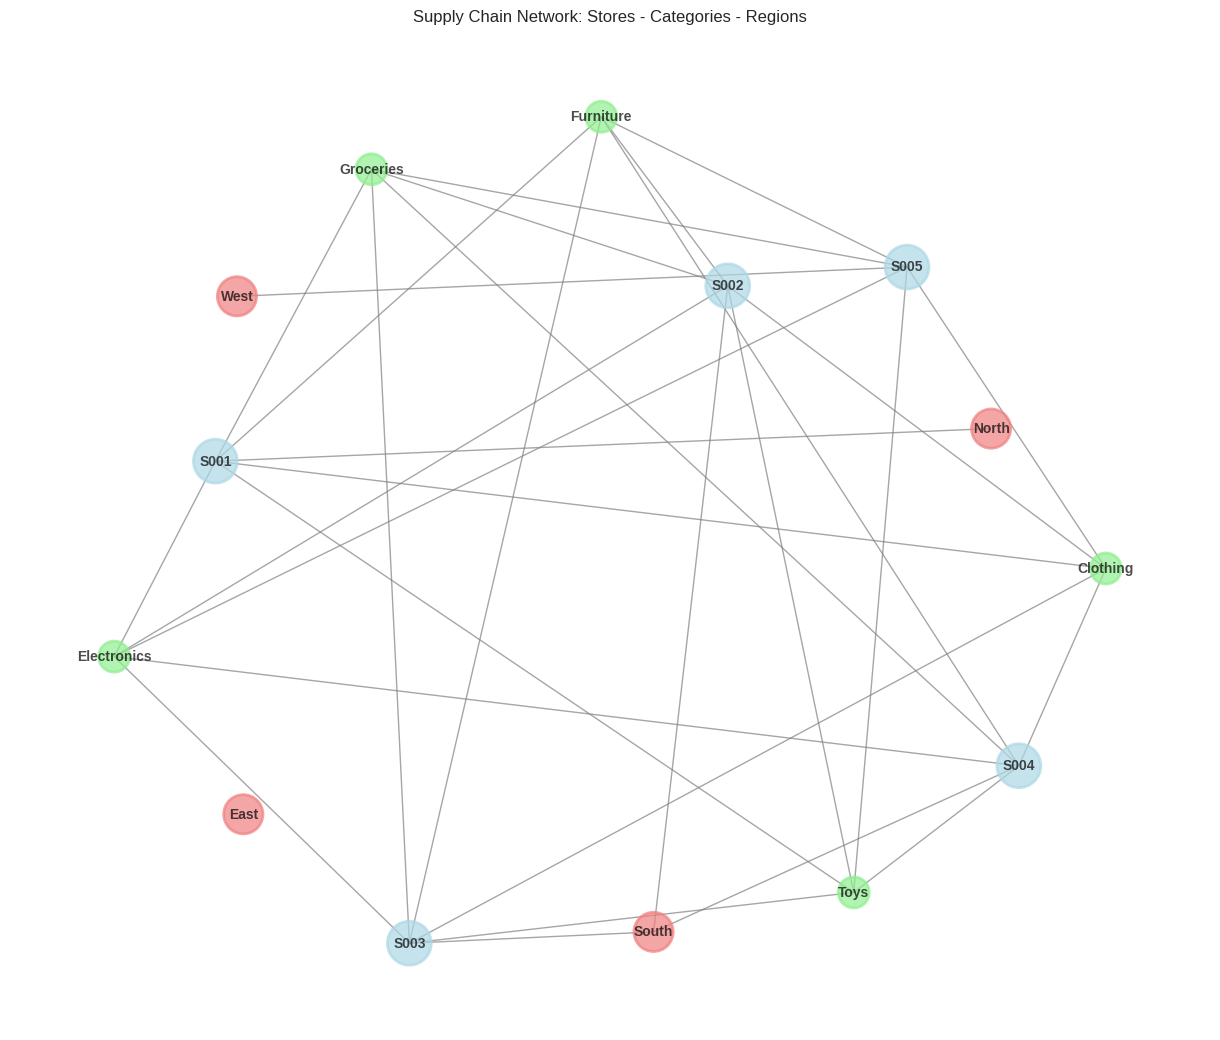

Network Analysis:
Number of nodes: 14
Number of edges: 30
Average degree: 4.29

Most central nodes (degree centrality):
  S001: 0.462
  S002: 0.462
  S003: 0.462
  S004: 0.462
  S005: 0.462


In [ ]:
import networkx as nx

def create_network_graph():
    # Create a simplified network
    G = nx.Graph()

    # Add nodes (stores as central hubs)
    stores = df['Store ID'].unique()
    categories = df['Category'].unique()
    regions = df['Region'].unique()

    # Add nodes
    for store in stores:
        G.add_node(store, type='store', size=1000)

    for category in categories:
        G.add_node(category, type='category', size=500)

    for region in regions:
        G.add_node(region, type='region', size=800)

    # Add edges based on relationships
    for store in stores:
        store_data = df[df['Store ID'] == store]
        # Connect store to its region
        region = store_data['Region'].iloc[0]
        G.add_edge(store, region, weight=2)

        # Connect store to categories it carries
        store_categories = store_data['Category'].unique()
        for category in store_categories:
            G.add_edge(store, category, weight=1)

    # Plot the network
    plt.figure(figsize=(12, 10))

    # Node colors by type
    node_colors = []
    for node in G.nodes():
        if G.nodes[node]['type'] == 'store':
            node_colors.append('lightblue')
        elif G.nodes[node]['type'] == 'category':
            node_colors.append('lightgreen')
        else:
            node_colors.append('lightcoral')

    # Node sizes
    node_sizes = [G.nodes[node]['size'] for node in G.nodes()]

    pos = nx.spring_layout(G, k=3, iterations=50)
    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            node_size=node_sizes, font_size=10, font_weight='bold',
            edge_color='gray', alpha=0.7, linewidths=2)

    plt.title('Supply Chain Network: Stores - Categories - Regions')
    plt.show()

    # Network metrics
    print("Network Analysis:")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Average degree: {np.mean([d for n, d in G.degree()]):.2f}")

    # Centrality measures
    degree_centrality = nx.degree_centrality(G)
    top_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nMost central nodes (degree centrality):")
    for node, centrality in top_central:
        print(f"  {node}: {centrality:.3f}")

create_network_graph()

Most Common Issues:
normal: 66647
operations: 66647
s005: 13381
s004: 13338
s003: 13331
s002: 13304
s001: 13293
p0001: 3655
p0002: 3655
p0003: 3655
p0004: 3655
p0005: 3655
p0006: 3655
p0007: 3655
p0008: 3655


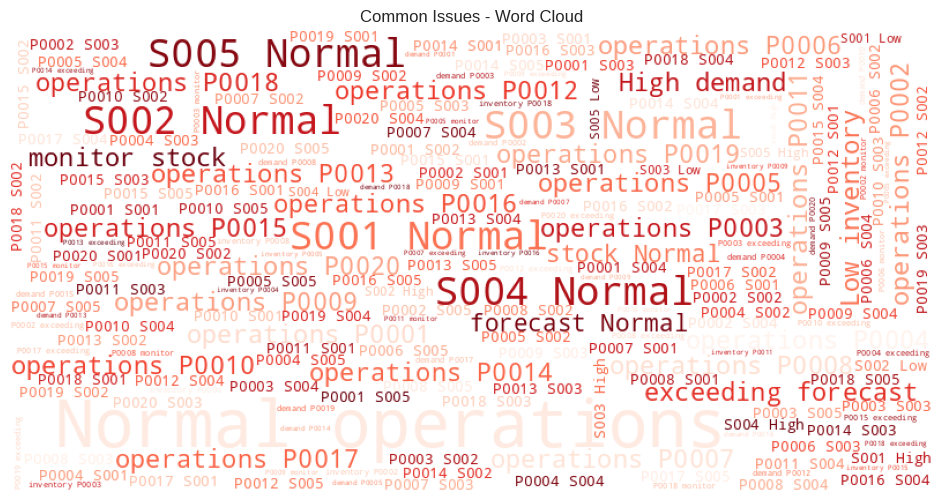

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('retail_store_inventory.csv')

def analyze_text_data():
    notes = []
    for _, row in df.iterrows():
        if row['Inventory Level'] < 30:
            notes.append(f"Critical low stock {row['Product ID']} {row['Region']} urgent reorder")
        elif row['Inventory Level'] < 70:
            notes.append(f"Low inventory {row['Product ID']} monitor stock")
        elif row['Units Sold'] > row['Demand Forecast'] * 1.2:
            notes.append(f"High demand {row['Product ID']} exceeding forecast")
        elif row['Discount'] > 20:
            notes.append(f"Deep discount {row['Product ID']} driving sales")
        else:
            notes.append(f"Normal operations {row['Product ID']} {row['Store ID']}")

    all_text = ' '.join(notes)
    words = all_text.lower().split()
    stop_words = {'for', 'in', 'the', 'and', 'of', 'to', 'a', 'with', 'is', 'on'}
    filtered_words = [word for word in words if word not in stop_words and len(word) > 3]
    common_words = Counter(filtered_words).most_common(15)

    print("Most Common Issues:")
    for word, count in common_words:
        print(f"{word}: {count}")

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Common Issues - Word Cloud')
    plt.show()

analyze_text_data()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Load and prep data
df = pd.read_csv('retail_store_inventory.csv')
df['Date'] = pd.to_datetime(df['Date'])

def create_dashboard():
    # Hierarchical data
    hierarchical_data = df.groupby(['Region', 'Store ID', 'Category']).agg({
        'Inventory Level': 'sum', 'Units Sold': 'sum', 'Product ID': 'count'
    }).reset_index().rename(columns={'Product ID': 'Product Count'})

    # Text data simulation
    notes = [f"{'Critical low stock' if row['Inventory Level'] < 30 else 'Low inventory' if row['Inventory Level'] < 70 else 'High demand' if row['Units Sold'] > row['Demand Forecast'] * 1.2 else 'Normal operations'} {row['Product ID']}"
             for _, row in df.iterrows()]

    # Create dashboard
    fig = make_subplots(rows=2, cols=3, specs=[[{"type": "treemap"}, {"type": "xy"}, {"type": "xy"}],
                                               [{"type": "heatmap"}, {"type": "xy"}, {"type": "table"}]],
                        subplot_titles=('Hierarchical View', 'Sales by Category', 'Common Issues',
                                       'Regional Heatmap', 'Inventory Trend', 'KPIs'))

    # 1. Hierarchical Treemap
    treemap = px.treemap(hierarchical_data, path=['Region', 'Store ID', 'Category'], values='Inventory Level')
    fig.add_trace(treemap.data[0], row=1, col=1)

    # 2. Sales by Category
    category_sales = df.groupby('Category')['Units Sold'].sum().reset_index()
    bar = px.bar(category_sales, x='Category', y='Units Sold')
    fig.add_trace(bar.data[0], row=1, col=2)

    # 3. Word Frequency
    words = ' '.join(notes).lower().split()
    common_words = pd.Series([w for w in words if len(w) > 3]).value_counts().head(10)
    word_bar = px.bar(x=common_words.index, y=common_words.values)
    fig.add_trace(word_bar.data[0], row=1, col=3)

    # 4. Regional Heatmap
    heat_data = df.groupby(['Region', 'Category'])['Inventory Level'].sum().reset_index()
    # Use go.Heatmap instead of px.heatmap
    heatmap_trace = go.Heatmap(
        x=heat_data['Region'],
        y=heat_data['Category'],
        z=heat_data['Inventory Level'],
        colorscale='RdYlGn'
    )
    fig.add_trace(heatmap_trace, row=2, col=1)

    # 5. Inventory Trend
    inventory_trend_data = df.groupby('Date')['Inventory Level'].mean().reset_index()
    inventory_line = px.line(inventory_trend_data, x='Date', y='Inventory Level')
    fig.add_trace(inventory_line.data[0], row=2, col=2)

    # 6. KPIs Table
    kpi_data = pd.DataFrame({
        'KPI': ['Total Inventory', 'Total Units Sold', 'Average Price'],
        'Value': [df['Inventory Level'].sum(), df['Units Sold'].sum(), df['Price'].mean().round(2)]
    })
    kpi_table = go.Table(header=dict(values=list(kpi_data.columns)),
                         cells=dict(values=[kpi_data[col] for col in kpi_data.columns]))
    fig.add_trace(kpi_table, row=2, col=3)


    fig.update_layout(height=800, title_text="Comprehensive Inventory Dashboard")
    fig.show()

create_dashboard()

In [ ]:
import plotly.express as px

def warehouse_mapping():
    # Simulate coordinates for stores (latitude, longitude)
    store_coords = {
        'S001': (40.7128, -74.0060),   # North - New York
        'S002': (34.0522, -118.2437),  # South - Los Angeles
        'S003': (41.8781, -87.6298),   # West - Chicago
        'S004': (32.7767, -96.7970),   # East - Dallas
        'S005': (39.9526, -75.1652)    # Central - Philadelphia
    }

    # Aggregate store data
    store_data = df.groupby('Store ID').agg({
        'Inventory Level': 'sum',
        'Units Sold': 'sum',
        'Product ID': 'count',
        'Region': 'first'
    }).reset_index()

    # Add coordinates
    store_data['Lat'] = store_data['Store ID'].map({k: v[0] for k, v in store_coords.items()})
    store_data['Lon'] = store_data['Store ID'].map({k: v[1] for k, v in store_coords.items()})

    # Calculate stockout risk score
    store_data['Stockout_Risk_Score'] = store_data['Units Sold'] / store_data['Inventory Level']

    # Create map
    fig = px.scatter_mapbox(store_data,
                          lat="Lat",
                          lon="Lon",
                          size="Inventory Level",
                          color="Stockout_Risk_Score",
                          hover_name="Store ID",
                          hover_data={
                              "Inventory Level": True,
                              "Units Sold": True,
                              "Region": True,
                              "Stockout_Risk_Score": ":.2f"
                          },
                          color_continuous_scale=px.colors.sequential.Reds,
                          size_max=40,
                          zoom=3,
                          title="Warehouse/Store Locations and Stock Levels")

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
    fig.show()

    print("Store Locations and Inventory Summary:")
    print(store_data[['Store ID', 'Region', 'Inventory Level', 'Units Sold', 'Stockout_Risk_Score']].round(2))

warehouse_mapping()

Store Locations and Inventory Summary:
  Store ID Region  Inventory Level  Units Sold  Stockout_Risk_Score
0     S001  North          3996230     1975750                 0.49
1     S002  South          3996054     1987715                 0.50
2     S003  South          4047873     2022696                 0.50
3     S004  South          3981096     1979245                 0.50
4     S005   West          4042495     2010176                 0.50


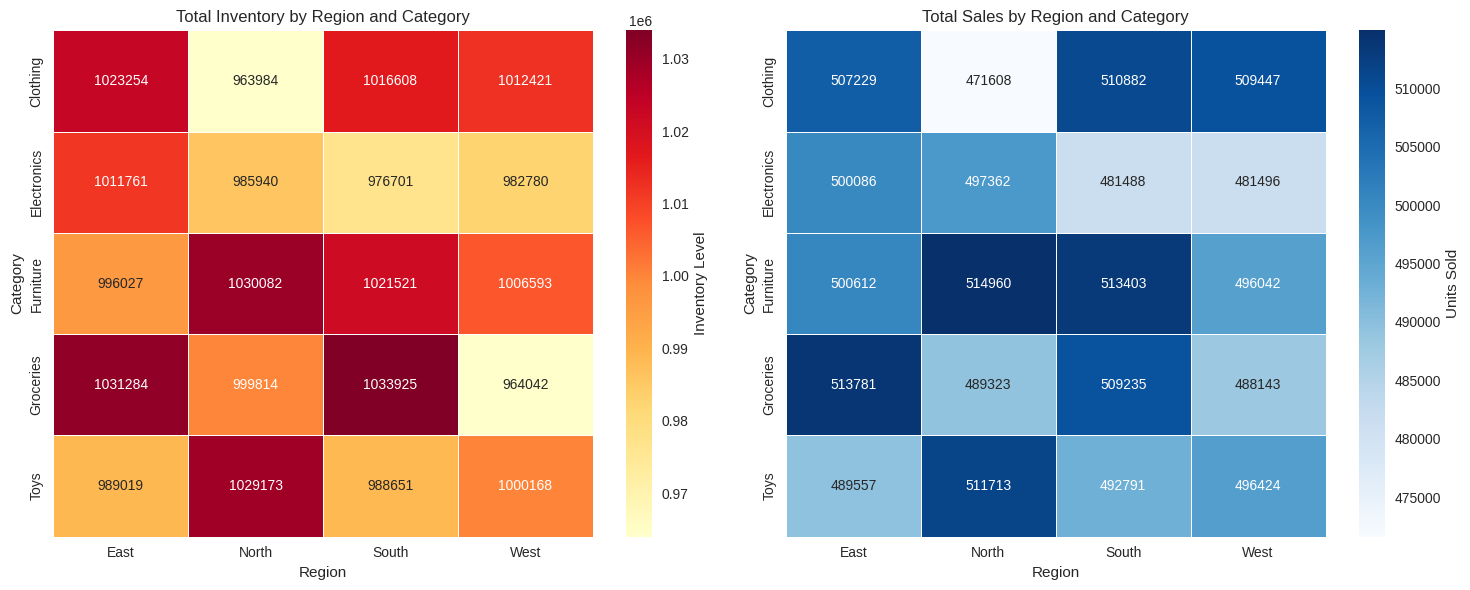


Regional Efficiency Analysis:
  Region  Inventory Level  Units Sold  Product ID  Inventory_per_Product  \
0   East          5051345     2511265       18349                275.293   
1  North          5008993     2484966       18228                274.797   
2  South          5037406     2507799       18297                275.313   
3   West          4966004     2471552       18226                272.468   

   Sales_per_Product  Efficiency_Ratio  
0            136.861             0.497  
1            136.327             0.496  
2            137.061             0.498  
3            135.606             0.498  


In [ ]:
def regional_inventory_heatmap():
    # Create region-category matrix
    region_category_data = df.groupby(['Region', 'Category']).agg({
        'Inventory Level': 'sum',
        'Units Sold': 'sum',
        'Product ID': 'count'
    }).reset_index()

    # Pivot for heatmap
    inventory_pivot = region_category_data.pivot(index='Category', columns='Region', values='Inventory Level')
    sales_pivot = region_category_data.pivot(index='Category', columns='Region', values='Units Sold')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Inventory heatmap
    sns.heatmap(inventory_pivot, annot=True, fmt='.0f', cmap='YlOrRd',
                linewidths=0.5, ax=axes[0], cbar_kws={'label': 'Inventory Level'})
    axes[0].set_title('Total Inventory by Region and Category')

    # Sales heatmap
    sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='Blues',
                linewidths=0.5, ax=axes[1], cbar_kws={'label': 'Units Sold'})
    axes[1].set_title('Total Sales by Region and Category')

    plt.tight_layout()
    plt.show()

    # Regional efficiency analysis
    region_efficiency = df.groupby('Region').agg({
        'Inventory Level': 'sum',
        'Units Sold': 'sum',
        'Product ID': 'count'
    }).reset_index()

    region_efficiency['Inventory_per_Product'] = region_efficiency['Inventory Level'] / region_efficiency['Product ID']
    region_efficiency['Sales_per_Product'] = region_efficiency['Units Sold'] / region_efficiency['Product ID']
    region_efficiency['Efficiency_Ratio'] = region_efficiency['Units Sold'] / region_efficiency['Inventory Level']

    print("\nRegional Efficiency Analysis:")
    print(region_efficiency.round(3))

regional_inventory_heatmap()

In [ ]:
def animated_stock_visualization():
    # Prepare data for animation
    df['Date'] = pd.to_datetime(df['Date'])

    # Aggregate by date and category
    animated_data = df.groupby(['Date', 'Category']).agg({
        'Inventory Level': 'mean',
        'Units Sold': 'sum',
        'Product ID': 'count'
    }).reset_index()

    animated_data.rename(columns={'Product ID': 'Product_Count'}, inplace=True)

    # Create animated scatter plot
    fig = px.scatter(animated_data,
                   x="Units Sold",
                   y="Inventory Level",
                   animation_frame=animated_data['Date'].astype(str),
                   size="Product_Count",
                   color="Category",
                   hover_name="Category",
                   size_max=45,
                   range_x=[0, animated_data['Units Sold'].max() * 1.1],
                   range_y=[0, animated_data['Inventory Level'].max() * 1.1],
                   title="Animated Stock Levels Over Time by Category")

    fig.update_layout(showlegend=True)
    fig.show()

    # Alternative: Animated bar chart by region
    region_animated = df.groupby(['Date', 'Region']).agg({
        'Inventory Level': 'sum'
    }).reset_index()

    fig2 = px.bar(region_animated,
                 x="Region",
                 y="Inventory Level",
                 animation_frame=region_animated['Date'].astype(str),
                 color="Region",
                 title="Animated Regional Inventory Levels Over Time")

    fig2.show()

animated_stock_visualization()

In [ ]:
def product_sales_timeseries():
    # Sales by category over time
    category_sales = df.groupby(['Date', 'Category'])['Units Sold'].sum().reset_index()

    # Create time series plot
    fig = px.line(category_sales,
                 x='Date',
                 y='Units Sold',
                 color='Category',
                 title='Product Category Sales Over Time',
                 labels={'Units Sold': 'Total Units Sold', 'Date': 'Date'},
                 template='plotly_white')

    fig.update_layout(
        xaxis=dict(rangeslider=dict(visible=True)),
        yaxis=dict(title='Units Sold'),
        hovermode='x unified'
    )

    fig.show()

    # Sales trends by category
    print("Sales Trends by Category:")
    categories = df['Category'].unique()

    for category in categories:
        cat_data = category_sales[category_sales['Category'] == category]
        if len(cat_data) > 1:
            trend = np.polyfit(range(len(cat_data)), cat_data['Units Sold'], 1)[0]
            avg_sales = cat_data['Units Sold'].mean()
            print(f"{category}: Trend = {trend:.2f} units/day, Avg Sales = {avg_sales:.1f} units/day")

    # Seasonal analysis
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.day_name()

    monthly_sales = df.groupby(['Month', 'Category'])['Units Sold'].sum().reset_index()

    fig2 = px.line(monthly_sales,
                  x='Month',
                  y='Units Sold',
                  color='Category',
                  title='Monthly Sales Patterns by Category',
                  markers=True)

    fig2.show()

product_sales_timeseries()

Sales Trends by Category:
Groceries: Trend = -0.33 units/day, Avg Sales = 2736.6 units/day
Toys: Trend = -0.11 units/day, Avg Sales = 2723.0 units/day
Electronics: Trend = 0.10 units/day, Avg Sales = 2681.8 units/day
Furniture: Trend = 0.19 units/day, Avg Sales = 2770.2 units/day
Clothing: Trend = 0.04 units/day, Avg Sales = 2734.8 units/day


Weekday vs Weekend Comparison:
         Inventory Level  Units Sold  Units Ordered  Product ID
Weekday           274.29      136.63         110.17       52100
Weekend           274.92      136.06         109.60       21000

Key Insights:
Sales increase on weekends: -0.4%
Weekday average sales: 136.6 units
Weekend average sales: 136.1 units


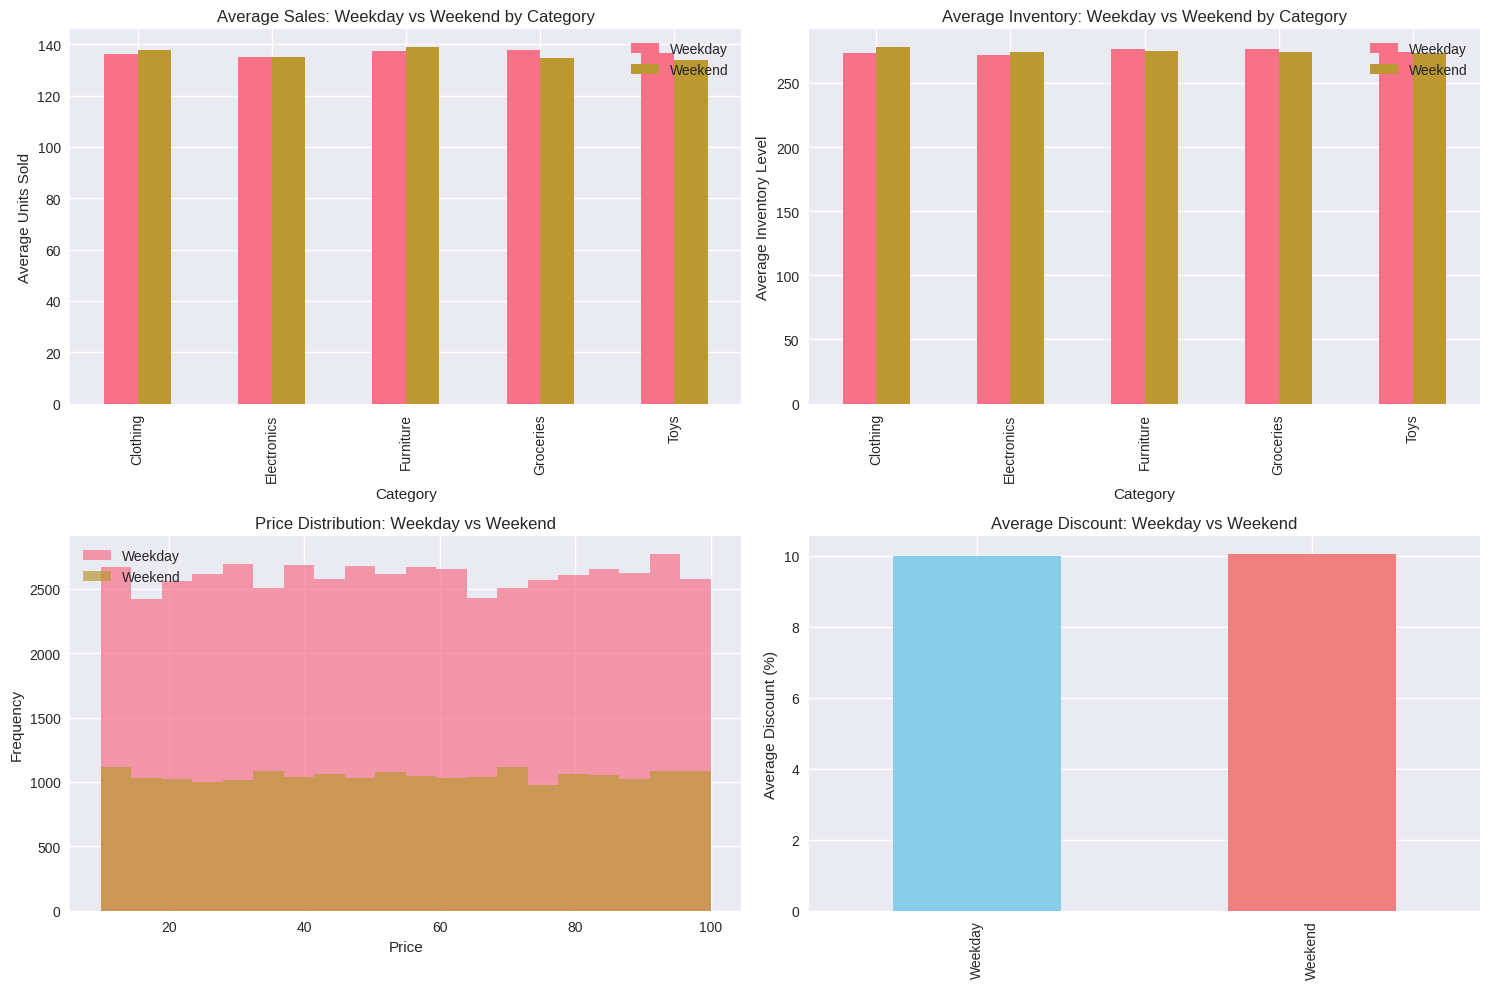

In [ ]:
def weekday_weekend_comparison():
    # Add weekday/weekend classification
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.day_name()
    df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

    # Compare metrics
    comparison = df.groupby('Is_Weekend').agg({
        'Inventory Level': 'mean',
        'Units Sold': 'mean',
        'Units Ordered': 'mean',
        'Product ID': 'count'
    }).round(2)

    comparison.index = ['Weekday', 'Weekend']

    print("Weekday vs Weekend Comparison:")
    print(comparison)

    # Statistical comparison
    weekday_sales = df[df['Is_Weekend'] == False]['Units Sold']
    weekend_sales = df[df['Is_Weekend'] == True]['Units Sold']

    sales_increase_pct = ((weekend_sales.mean() / weekday_sales.mean()) - 1) * 100

    print(f"\nKey Insights:")
    print(f"Sales increase on weekends: {sales_increase_pct:.1f}%")
    print(f"Weekday average sales: {weekday_sales.mean():.1f} units")
    print(f"Weekend average sales: {weekend_sales.mean():.1f} units")

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Sales comparison by category
    category_comparison = df.groupby(['Category', 'Is_Weekend'])['Units Sold'].mean().unstack()
    category_comparison.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Average Sales: Weekday vs Weekend by Category')
    axes[0,0].set_ylabel('Average Units Sold')
    axes[0,0].legend(['Weekday', 'Weekend'])

    # Inventory comparison
    inventory_comparison = df.groupby(['Category', 'Is_Weekend'])['Inventory Level'].mean().unstack()
    inventory_comparison.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Average Inventory: Weekday vs Weekend by Category')
    axes[0,1].set_ylabel('Average Inventory Level')
    axes[0,1].legend(['Weekday', 'Weekend'])

    # Price distribution
    df[df['Is_Weekend'] == False]['Price'].hist(alpha=0.7, label='Weekday', ax=axes[1,0], bins=20)
    df[df['Is_Weekend'] == True]['Price'].hist(alpha=0.7, label='Weekend', ax=axes[1,0], bins=20)
    axes[1,0].set_title('Price Distribution: Weekday vs Weekend')
    axes[1,0].set_xlabel('Price')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()

    # Discount comparison
    discount_comparison = df.groupby('Is_Weekend')['Discount'].mean()
    discount_comparison.index = ['Weekday', 'Weekend']
    discount_comparison.plot(kind='bar', ax=axes[1,1], color=['skyblue', 'lightcoral'])
    axes[1,1].set_title('Average Discount: Weekday vs Weekend')
    axes[1,1].set_ylabel('Average Discount (%)')

    plt.tight_layout()
    plt.show()

weekday_weekend_comparison()

Stockout Risk Clusters Profile:
              Sales_Velocity  Forecast_Accuracy  Stock_Turnover  \
Risk_Cluster                                                      
0                      0.491              0.036           0.491   
1                      0.498              0.035           0.498   

              Stockout_Risk_Score  Product ID  
Risk_Cluster                                   
0                           0.212           7  
1                           0.213          13  


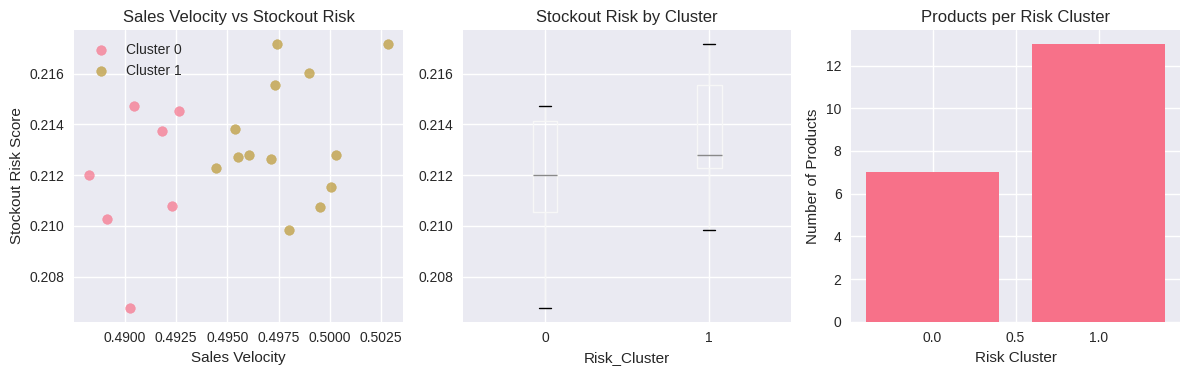


Regression Analysis for Stockout Risk:
Feature Importance for Stockout Risk:
             Feature  Coefficient  Absolute_Importance
1  Forecast_Accuracy     1.745025             1.745025
0     Sales_Velocity     0.442389             0.442389
2              Price     0.001692             0.001692
3           Discount    -0.000546             0.000546


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

def stockout_risk_analysis():
    # Prepare product-level data
    product_data = df.groupby('Product ID').agg({
        'Inventory Level': 'mean',
        'Units Sold': 'mean',
        'Units Ordered': 'mean',
        'Demand Forecast': 'mean',
        'Price': 'mean',
        'Discount': 'mean',
        'Category': 'first',
        'Region': 'first'
    }).reset_index()

    # Feature engineering for stockout risk
    product_data['Sales_Velocity'] = product_data['Units Sold'] / (product_data['Inventory Level'] + 1)
    product_data['Forecast_Accuracy'] = abs(product_data['Units Sold'] - product_data['Demand Forecast']) / (product_data['Demand Forecast'] + 1)
    product_data['Stock_Turnover'] = product_data['Units Sold'] / (product_data['Inventory Level'] + 1)
    product_data['Stockout_Risk_Score'] = (product_data['Sales_Velocity'] * 0.4 +
                                         product_data['Forecast_Accuracy'] * 0.3 +
                                         (1 - (product_data['Inventory Level'] / product_data['Inventory Level'].max())) * 0.3)

    # Clustering for risk categories
    features = ['Sales_Velocity', 'Forecast_Accuracy', 'Stock_Turnover', 'Price']
    X = product_data[features]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Find optimal number of clusters
    silhouette_scores = []
    for k in range(2, 8):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, labels))

    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

    # Apply clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    product_data['Risk_Cluster'] = kmeans.fit_predict(X_scaled)

    # Name clusters based on characteristics
    cluster_profiles = product_data.groupby('Risk_Cluster').agg({
        'Sales_Velocity': 'mean',
        'Forecast_Accuracy': 'mean',
        'Stock_Turnover': 'mean',
        'Stockout_Risk_Score': 'mean',
        'Product ID': 'count'
    }).round(3)

    print("Stockout Risk Clusters Profile:")
    print(cluster_profiles)

    # Visualize clusters
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    for cluster in range(optimal_k):
        cluster_data = product_data[product_data['Risk_Cluster'] == cluster]
        plt.scatter(cluster_data['Sales_Velocity'], cluster_data['Stockout_Risk_Score'],
                   label=f'Cluster {cluster}', alpha=0.7)
    plt.xlabel('Sales Velocity')
    plt.ylabel('Stockout Risk Score')
    plt.legend()
    plt.title('Sales Velocity vs Stockout Risk')

    plt.subplot(1, 3, 2)
    product_data.boxplot(column='Stockout_Risk_Score', by='Risk_Cluster', ax=plt.gca())
    plt.title('Stockout Risk by Cluster')
    plt.suptitle('')

    plt.subplot(1, 3, 3)
    risk_distribution = product_data['Risk_Cluster'].value_counts().sort_index()
    plt.bar(risk_distribution.index, risk_distribution.values)
    plt.xlabel('Risk Cluster')
    plt.ylabel('Number of Products')
    plt.title('Products per Risk Cluster')

    plt.tight_layout()
    plt.show()

    # Regression analysis for stockout prediction
    print("\nRegression Analysis for Stockout Risk:")
    X_reg = product_data[['Sales_Velocity', 'Forecast_Accuracy', 'Price', 'Discount']]
    y_reg = product_data['Stockout_Risk_Score']

    regressor = LinearRegression()
    regressor.fit(X_reg, y_reg)

    feature_importance = pd.DataFrame({
        'Feature': X_reg.columns,
        'Coefficient': regressor.coef_,
        'Absolute_Importance': abs(regressor.coef_)
    }).sort_values('Absolute_Importance', ascending=False)

    print("Feature Importance for Stockout Risk:")
    print(feature_importance)

    return product_data

risk_analysis_results = stockout_risk_analysis()

MAE: 87.96
RMSE: 108.02
R2 Score: 0.31


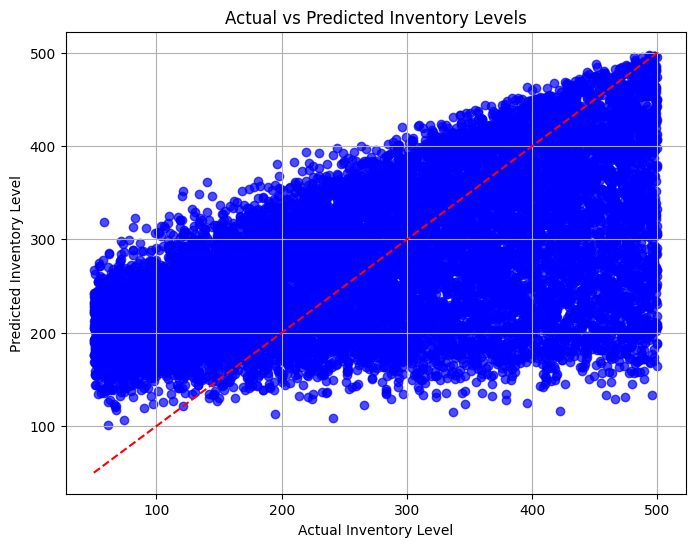

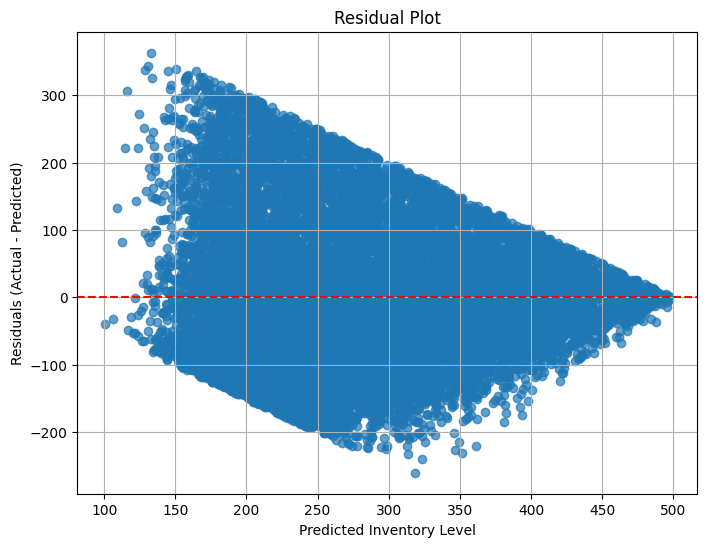

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('retail_store_inventory.csv')

# Prepare features and target using your actual data
X = df[['Units Sold', 'Units Ordered', 'Price', 'Discount', 'Demand Forecast']]
y = df['Inventory Level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualization: True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Inventory Level")
plt.ylabel("Predicted Inventory Level")
plt.title("Actual vs Predicted Inventory Levels")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Inventory Level")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

Mean Absolute Error: 87.96
R² Score: 0.31


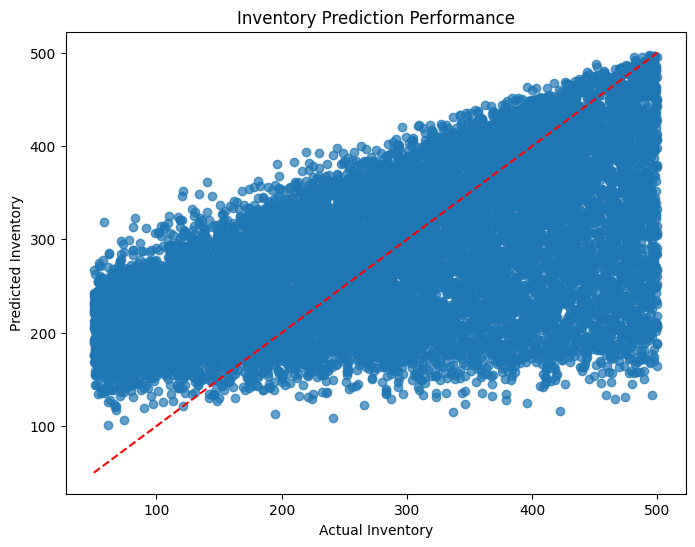

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
df = pd.read_csv('retail_store_inventory.csv')

# Prepare features and target
X = df[['Units Sold', 'Units Ordered', 'Price', 'Discount', 'Demand Forecast']]
y = df['Inventory Level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Inventory")
plt.ylabel("Predicted Inventory")
plt.title("Inventory Prediction Performance")
plt.show()